<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

In [2]:
from matplotlib import pyplot as plt

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([3.23573036, 7.40047927, 8.595813  , 8.45153307, 0.61852188,
       4.80294891, 3.70570975, 4.97061438, 5.51876221, 7.30695298])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

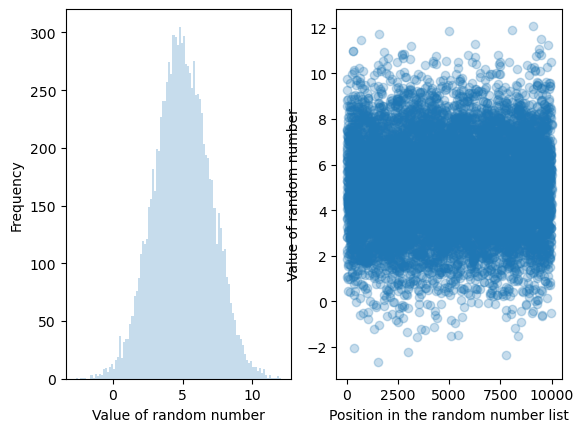

In [5]:
n = 10000
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [6]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.62%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [13]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [3]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

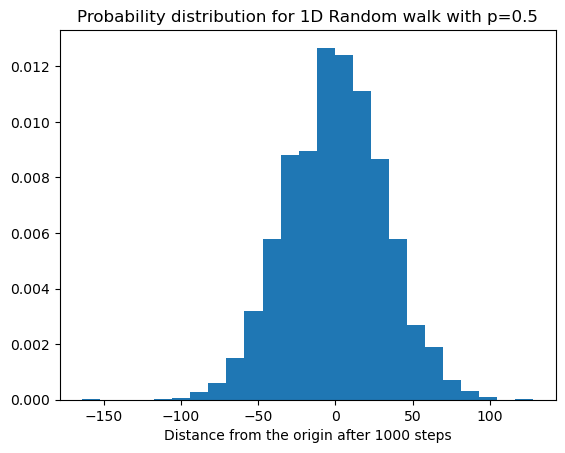

In [10]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.2 The simulation

In [ ]:

# Your code here


### 1.3 What does theory say?

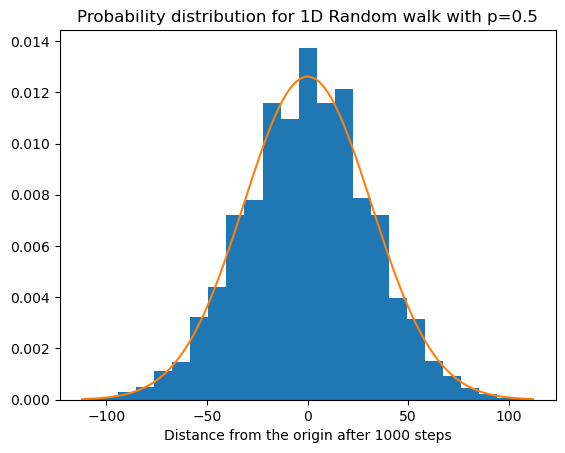

In [16]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_right = 0.5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [20]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.15052

### 2.3 A better solution

In [19]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)


3.141728

### 2.4 A smarter solution

In [21]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.140272

## Exercise 1 :  Vital Stats of Random π

In [7]:
def estimate_pi(n):
    x=rnd.uniform(low=-1, high=1, size=n)
    y=rnd.uniform(low=-1, high=1, size=n)
    n_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!
    return 4 * (n_green / n)



In [20]:
nx100 = [estimate_pi(10000) for n in range(100)]

np.mean(nx100)

3.144568000000001

In [21]:
np.std(nx100)

0.016867690298318843

In [24]:
n = ['10', '100', '1000', '10000', '100000', '1000000']

[estimate_pi(n) for n in range(100)]

C:\Users\Yun Na\AppData\Local\Temp\ipykernel_5544\634681645.py:5: RuntimeWarning: invalid value encountered in long_scalars
  return 4 * (n_green / n)


[nan,
 0.0,
 4.0,
 2.6666666666666665,
 4.0,
 2.4,
 4.0,
 2.857142857142857,
 3.0,
 3.5555555555555554,
 3.2,
 2.909090909090909,
 2.6666666666666665,
 4.0,
 3.4285714285714284,
 3.7333333333333334,
 2.25,
 3.5294117647058822,
 3.7777777777777777,
 3.1578947368421053,
 2.6,
 3.619047619047619,
 3.090909090909091,
 2.9565217391304346,
 2.8333333333333335,
 3.84,
 3.5384615384615383,
 3.4074074074074074,
 3.142857142857143,
 3.1724137931034484,
 3.6,
 3.096774193548387,
 2.875,
 3.272727272727273,
 3.176470588235294,
 3.3142857142857145,
 2.6666666666666665,
 3.4594594594594597,
 3.473684210526316,
 3.076923076923077,
 3.1,
 3.317073170731707,
 3.5238095238095237,
 3.1627906976744184,
 3.090909090909091,
 3.2,
 3.0434782608695654,
 3.0638297872340425,
 3.5,
 3.020408163265306,
 3.2,
 3.215686274509804,
 3.3846153846153846,
 3.2452830188679247,
 3.111111111111111,
 3.1272727272727274,
 3.2142857142857144,
 2.9473684210526314,
 2.896551724137931,
 3.1864406779661016,
 3.1333333333333333,
 